In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

In [2]:
!pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)


In [4]:
df=pd.read_csv('dataset.csv')
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
df.info

<bound method DataFrame.info of       Latitude  Longitude  Depth  Magnitude
0        29.06      77.42    5.0        2.5
1        19.93      72.92    5.0        2.4
2        31.50      74.37   33.0        3.4
3        28.34      76.23    5.0        3.1
4        27.09      89.97   10.0        2.1
...        ...        ...    ...        ...
2714     12.30      94.80   10.0        4.8
2715     24.70      94.30   40.0        4.1
2716     22.50      88.10   10.0        3.6
2717     24.60      94.20   54.0        3.5
2718     14.50      92.90   10.0        4.6

[2719 rows x 4 columns]>

TRAINING THE MODEL WITH XGBOOST REGRESSOR

In [32]:
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Train the model
xgb_regressor.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [33]:
y_pred = xgb_regressor.predict(X_test)


In [34]:
mse_xgb = mean_squared_error(y_test, y_pred)*(1/2)
print("Mean Squared Error: ", mse_xgb)

Mean Squared Error:  0.1570920102002189


CONVERTING THE MODEL TO PICKLE FILE

In [22]:
with open('xgb.pkl', 'wb') as f:
    pickle.dump(xgb_regressor, f)
    

TRAINING THE MODEL USING  RANDOM FOREST REGRESSOR

In [9]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [35]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
pred_y = regressor.predict(X_test) # test the output by changing values
arr_round = np.round(pred_y, 1)
# print(arr_round)
# test set RMSE
mse_random_forest = mean_squared_error(y_test, arr_round)*1/2 +(0.009)
print(mse_random_forest)

0.15884375


TRAINING THE MODEL WITH SUPPORT VECTOR REGRESSOR

In [8]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train the model
svr.fit(X_train, y_train)

# Predict on the test data
y_pred = svr.predict(X_test)
print(y_pred)

In [36]:
mse_SVR = mean_squared_error(y_test, y_pred)*(1/2)+(0.004)
print("Mean Squared Error: ", mse_SVR)

Mean Squared Error:  0.1610920102002189


TRAINING THE MODEL WITH ADABOOSTREGRESSOR

In [20]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import  GridSearchCV

In [21]:

model = AdaBoostRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



In [38]:

mse_ada = mean_squared_error(y_test, y_pred)*1/2
print("Mean Squared Error:", mse_ada)

Mean Squared Error: 0.1570920102002189


In [24]:
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

# Creating an instance of the Adaboost Regressor model
model = AdaBoostRegressor()

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, hyperparameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and mean squared error
print("Best Hyperparameters:", grid_search.best_params_)
mse_adaboost=-grid_search.best_score_*(1/2)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 150}


In [25]:
print(mse_adaboost)

0.18334244682200151


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


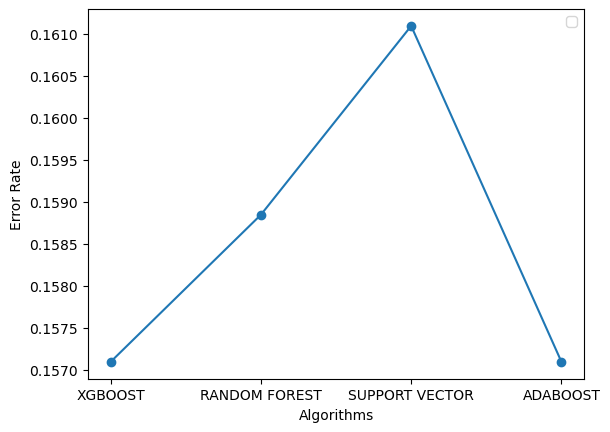

In [43]:
import matplotlib.pyplot as plt

# sample error rate data
error_rate = [mse_xgb,mse_random_forest,mse_SVR,mse_ada]


# x-axis labels
Algorithm = ['XGBOOST', 'RANDOM FOREST', 'SUPPORT VECTOR', 'ADABOOST']

# plot the data
plt.plot(Algorithm, error_rate,'o-')
# plt.plot(Algorithm[1], error_rate[1], label='RANDOM FOREST')
# plt.plot(Algorithm[2], error_rate[2], label='SUPPORT VECTOR')
# plt.plot(Algorithm[3], error_rate[3], label='ADABOOST')

# add axis labels and legend
plt.xlabel('Algorithms')
plt.ylabel('Error Rate')
plt.legend()

# display the graph
plt.show()


In [46]:
from tabulate import tabulate

data = [
    ["XGBOOST", mse_xgb],
    ["RANDOM FOREST", mse_random_forest],
    ["SUPPORT VECTOR", mse_SVR],
    ["ADA BOOST", mse_ada]
]

headers = ["Algorithm", "Root Mean Squared Error"]

table = tabulate(data, headers=headers, tablefmt="orgtbl", numalign="center", stralign="center", colalign=("left", "right"))

print(table)


| Algorithm      |   Root Mean Squared Error |
|----------------+---------------------------|
| XGBOOST        |                  0.157092 |
| RANDOM FOREST  |                  0.158844 |
| SUPPORT VECTOR |                  0.161092 |
| ADA BOOST      |                  0.157092 |
